<table align="left">
  <td>
    <a href="https://tinyurl.com/2zzbxxep" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes Neuronales Convolucionales(CNN) - Tensorflow

Las redes neuronales convolucionales son una variación de las redes neuronales artificiales que se han vuelto muy populares en el campo del aprendizaje profundo. Las redes neuronales convolucionales son muy eficientes para analizar imágenes y videos.

Visión computacional es una rama de la inteligencia artificial que se ocupa de hacer que las computadoras puedan entender imágenes y videos.

¿Qué es un problema de visión por computadora?: Problemos en los cuales se busca que una computadora pueda entender imágenes y videos.

- Clasificación de imágenes: Clasificar imágenes en diferentes categorías.
- Detección de objetos: Identificar objetos en una imagen.
- Segmentación de imágenes: Identificar qué parte de la imagen pertenece a qué objeto.
- Reconocimiento facial: Identificar quién está en una imagen.
- Reconocimiento de escenas: Identificar qué tipo de escena se está viendo en una imagen.
- Reconocimiento de texto: Identificar qué texto está escrito en una imagen.
- Reconocimiento de voz: Identificar qué se está diciendo en un video.



Temas a cubrir en este notebook:

* Obtener dataset para trabajar con ellos
* Arquitectura de una CNN
* Un ejemplo end-to-end de una CNN
* Pasos para el modelamiento de un problema de clasificación binaria con CNN
    * Conocer los datos
    * Preprocesamiento de los datos
    * Construcción del modelo de CNN
    * Entrenamiento del modelo
    * Evaluación del modelo
    * Mejorar el modelo
    * Realizar predicciones con el modelo entrenado
* Pasos para el modelamiento de un problema de clasificación multiclase con CNN
    * Conocer los datos
    * Preprocesamiento de los datos
    * Construcción del modelo de CNN
    * Entrenamiento del modelo
    * Evaluación del modelo
    * Mejorar el modelo
    * Realizar predicciones con el modelo entrenado

![cnn](https://i2.wp.com/datasmarts.net/es/wp-content/uploads/2018/11/1_N4h1SgwbWNmtrRhszM9EJg.png?fit=1558%2C424&ssl=1)

<a href="https://ibb.co/L0jfm19"><img src="https://i.ibb.co/QJSGLMY/cnn.png" alt="cnn" border="0"></a>

[:key: CNN Referencia: What is a Convolutional Neural Network?](https://poloclub.github.io/cnn-explainer/)

## Obtener dataset

Las imagenes que se utilizaran en el siguiente ejemplo hacen parte del dataset food101. Este dataset contiene 101,000 imágenes de 101 clases de comida diferentes. El dataset se encuentra dividido en 3 carpetas, una para entrenamiento, una para pruebas y otra para validación. Cada carpeta contiene 101 subcarpetas, una para cada clase de comida.

[:key: Dataset Referencia: Food101](https://www.tensorflow.org/datasets/catalog/food101)

Se utilizará el dataset pizza_steak, este dataset contiene imágenes de pizza y de carne asada. El dataset contiene 750 imágenes de pizza y 750 imágenes de carne asada. El dataset se encuentra dividido en 2 carpetas, una para entrenamiento y otra para pruebas. Cada carpeta contiene 2 subcarpetas, una para pizza y otra para carne asada.


In [63]:
import os

In [64]:
import zipfile
import wget # pip install wget - para windows

if(os.path.exists('pizza_steak')):
    print('Files exists')
else:
    # en caso de utilizar colab la descarga se puede realizar con el siguiente comando
    #!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

    # Download zip file of pizza_steak images using wget library in windows
    url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
    filename = wget.download(url)

    # Unzip the downloaded file
    zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
    zip_ref.extractall()
    zip_ref.close()

Files exists


## Inspeccionar el dataset

El objetivo de este paso es entender la estructura del dataset y ver si es posible utilizarlo para nuestro problema. Antes de empezar a trabajar con el dataset, es importante saber cuántas imágenes hay en el dataset, cuántas de cada clase, cuántas imágenes hay en el conjunto de entrenamiento y cuántas hay en el conjunto de pruebas.

In [65]:
!dir pizza_steak # para windows
#!ls pizza_steak # para colaboratory o linux

 El volumen de la unidad H es Google Drive

No se encuentra el archivo



 El n�mero de serie del volumen es: 1983-1116

 Directorio de h:\Mi unidad\Github\TensorFlow-Course\pizza_steak

24/09/2020  08:56 p. m.    <DIR>          .
19/12/2022  02:45 p. m.    <DIR>          ..
19/08/2020  11:21 p. m.    <DIR>          test
19/08/2020  07:31 p. m.    <DIR>          train
               0 archivos              0 bytes

 Directorio de h:\Mi unidad\Github\TensorFlow-Course


 Directorio de h:\Mi unidad\Github\TensorFlow-Course


 Directorio de h:\Mi unidad\Github\TensorFlow-Course



In [66]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.


### Nombre de las clases - 1
Para visualizar las imagenes, primero obtenemos los nombres de las clases de las imagenes.

In [67]:
# Obtener el nombre de las clases
# Este codigo crea una lista de clases utilizando el nombre de las carpetas
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [68]:
# Visualizar las imagenes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)


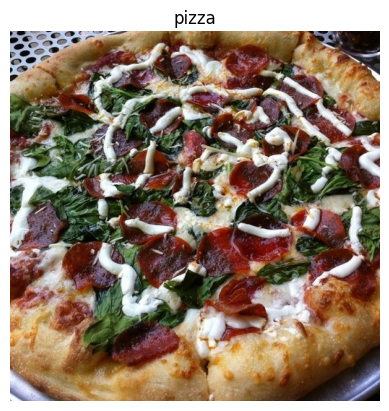

In [69]:
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [70]:
# Convertir una imagen en un tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 88,  90,  85],
        [114, 119, 115],
        [172, 176, 179],
        ...,
        [ 12,   7,   1],
        [ 14,   9,   3],
        [ 16,  11,   5]],

       [[ 12,  14,  11],
        [ 23,  27,  26],
        [ 56,  61,  65],
        ...,
        [ 13,   8,   2],
        [ 15,  10,   4],
        [ 17,  12,   6]],

       [[  0,   3,   6],
        [ 11,  14,  19],
        [  0,   1,  10],
        ...,
        [ 14,   9,   3],
        [ 16,  11,   5],
        [ 18,  13,   7]],

       ...,

       [[221, 225, 228],
        [239, 243, 244],
        [251, 255, 255],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[183, 183, 193],
        [212, 212, 220],
        [239, 242, 247],
        ...,
        [  2,   3,   0],
        [  2,   3,   0],
        [  3,   2,   0]],

       [[151, 151, 163],
        [166, 166, 176],
        [194, 197, 206],
        ...,
        [  1,   4,   

In [71]:
# Ver la dimension de la imagen
img.shape # devuelve width, height, color channels

(512, 512, 3)

## Ejemplo end-to-end de una CNN

En este ejemplo se va a construir una CNN desde cero para clasificar imágenes de pizza y de carne asada. El objetivo es construir una CNN que pueda clasificar imágenes de pizza y de carne asada con una precisión mayor al 95%.

- Cargar las imágenes
- Preprocesar las imágenes
- Construir un modelo de CNN para encontrar patrones en las imágenes
- Compilar el modelo de CNN
- Ajustar el modelo de CNN
- Evaluar el modelo de CNN
- Predecir con el modelo de CNN


### Normalizar las imagenes

:key: Normalizar las imagenes es un paso importante para que el modelo pueda aprender mejor. Normalizar las imagenes significa convertir las imagenes de un rango de valores de 0 a 255 a un rango de valores de 0 a 1. Esto se hace dividiendo cada valor de pixel por 255.


In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocesar las imagenes - normalizarlas entre 0 y 1
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Importar las imagenes desde el directorio y convertirlas en lotes
train_path = "pizza_steak/train/"
test_path = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory = train_path, 
                                                    batch_size = 32,
                                                    target_size = (224, 224),
                                                    class_mode = "binary",
                                                    seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_path,
                                                batch_size = 32,
                                                target_size = (224, 224),
                                                class_mode = "binary",
                                                seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [76]:
len(train_data) # 47 lotes de 32 imagenes cada uno
1500/32 # 47 lotes de 32 imagenes cada uno

46.875

In [77]:
len(valid_data) # 16 lotes de 32 imagenes cada uno
500/32 # 16 lotes de 32 imagenes cada uno

15.625

In [78]:
# Construir un modelo CNN (Tiny VGG the CNN explainer website https://poloclub.github.io/cnn-explainer/)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# Compilar el modelo
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entrenar el modelo
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno 
                        verbose=1)


Epoch 1/5
47/47 [==============================] - 22s 431ms/step - loss: 0.6035 - accuracy: 0.6493 - val_loss: 0.4111 - val_accuracy: 0.8140
Epoch 2/5
47/47 [==============================] - 18s 392ms/step - loss: 0.4428 - accuracy: 0.7953 - val_loss: 0.3588 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 18s 374ms/step - loss: 0.4004 - accuracy: 0.8273 - val_loss: 0.3333 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 18s 374ms/step - loss: 0.3617 - accuracy: 0.8473 - val_loss: 0.2870 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 18s 373ms/step - loss: 0.3177 - accuracy: 0.8780 - val_loss: 0.3126 - val_accuracy: 0.8600


In [61]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 109, 109, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 107, 107, 10)      910       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 105, 105, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 52, 52, 10)       

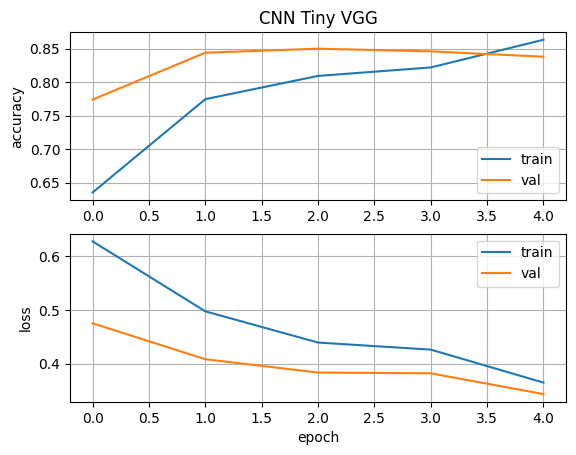

In [62]:
plt.subplot(211)
plt.title('CNN Tiny VGG')
plt.plot(history_1.history['accuracy'])  
plt.plot(history_1.history['val_accuracy'])
plt.ylabel('accuracy')  
plt.legend(['train', 'val'], loc='lower right')
plt.grid(True)

 # summarize history for loss  
plt.subplot(212)  
plt.plot(history_1.history['loss'])  
plt.plot(history_1.history['val_loss'])  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper right')  
plt.grid(True)

plt.show()

:key: Despues de 5 epochs, nuestro modelo obtuvo una exactitud de 87.8% en el conjunto de entrenamiento y una precisión de 86% en el conjunto de pruebas. Esto significa que nuestro modelo aprendió a clasificar correctamente las imágenes de pizza y de carne asada con una precisión de 86%.

Sin embargo, este modelo solo resuelve un problema de clasificación binaria. Los resultados muestran que el modelo aprendió algo. Sin embargo, no es suficiente para resolver el problema de clasificación multiclase que se tiene en el dataset food101.

## Red neuronal Densa para clasificación de imágenes

El siguiente modelo tiene como objetivo comparar el rendimiento de una red neuronal densa con el de una CNN para el problema de clasificación binario de pizza vs carne asada. El modelo de red neuronal densa tiene 3 capas ocultas, cada una con 100 neuronas.

In [ ]:
# set the seed
tf.random.set_seed(42)

# Crear un modelo

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# Compilar el modelo

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Entrenar el modelo

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 lotes de 32 imagenes cada uno
                        validation_data=valid_data,
                        validation_steps=len(valid_data), # 16 lotes de 32 imagenes cada uno
                        verbose=1)


: 

: 